# datasets sobre câncer de mama
---
**Foram estudadas 2 classes:**
*   Se o câncer for maligno: *WDBC-Malignant*
*   Se o câncer for benigno: *WDBC-Benign*

Num total de 569 amostras das classes sendo: 212 malignas *WDBC-Malignant*, benignas 357 WDBC-Benign

**Todas as características citadas/analisadas abaixo se refefrem a mama:**

*   raio (média das distâncias do centro aos pontos do perímetro);

*   textura (desvio padrão dos valores da escala de cinza);

*   perímetro;

*   área;

*   suavidade (variação local em comprimentos de raio);

*   compacidade (perímetro ^ 2 / área - 1,0);

*   concavidade (severidade das porções côncavas do contorno);

*   pontos côncavos (número de porções côncavas do contorno);

*   simetria;

*   dimensão fractal (“aproximação do litoral” - 1).

In [1]:
import torch

class Net(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super(Net, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size) #full connected
    self.relu = torch.nn.ReLU() #(0, infinito)
    self.fc2 = torch.nn.Linear(self.hidden_size, 1)
    self.sigmoid = torch.nn.Sigmoid() #(0, 1)
  def forward(self, x):
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    output = self.sigmoid(output)
    return output

In [2]:
from sklearn import datasets

breast_cancer = datasets.load_breast_cancer()
dados = breast_cancer.data
classes = breast_cancer.target

In [3]:
import numpy as np

entrada = torch.FloatTensor(dados) / 1000
saida = torch.FloatTensor(classes)

from sklearn.utils import shuffle
entrada, saida = shuffle(entrada, saida)

In [4]:
entrada_treinamento = entrada[0:539, :]
saida_treinamento = saida[0:539]
entrada_testes = entrada[509:569, :]
saida_testes = saida[509:569]

In [5]:
input_size = entrada_treinamento.size()[1]
hidden_size = 30
modelo = Net(input_size, hidden_size)

In [ ]:
epochs = 100000

criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(modelo.parameters(), lr = 0.9, momentum = 0.3)

errors = []

for epoch in range(epochs):
  optimizer.zero_grad()
  # Forward pass
  y_pred = modelo(entrada_treinamento)
  # Compute Loss
  loss = criterion(y_pred.squeeze(), saida_treinamento)
  errors.append(loss.item())
  if epoch % 1000 == 0:
    print('Epoca {}: aprendizado: {}'.format(epoch, loss.item()))
  # Backward pass
  loss.backward()
  optimizer.step()

  y_pred = modelo(entrada_testes)

Epoca 0: aprendizado: 0.25975584983825684
Epoca 1000: aprendizado: 0.05245685204863548
Epoca 2000: aprendizado: 0.04999050498008728
Epoca 3000: aprendizado: 0.04878530278801918
Epoca 4000: aprendizado: 0.04751169681549072
Epoca 5000: aprendizado: 0.0460517555475235
Epoca 6000: aprendizado: 0.044389508664608
Epoca 7000: aprendizado: 0.04456464946269989
Epoca 8000: aprendizado: 0.044770434498786926
Epoca 9000: aprendizado: 0.04445256292819977
Epoca 10000: aprendizado: 0.043915968388319016
Epoca 11000: aprendizado: 0.04338349774479866
Epoca 12000: aprendizado: 0.04271850362420082
Epoca 13000: aprendizado: 0.04203043878078461
Epoca 14000: aprendizado: 0.041292883455753326
Epoca 15000: aprendizado: 0.04043320193886757
Epoca 16000: aprendizado: 0.039575763046741486
Epoca 17000: aprendizado: 0.038697533309459686
Epoca 18000: aprendizado: 0.038075461983680725
Epoca 19000: aprendizado: 0.037453241646289825
Epoca 20000: aprendizado: 0.03673972189426422
Epoca 21000: aprendizado: 0.036273639649152

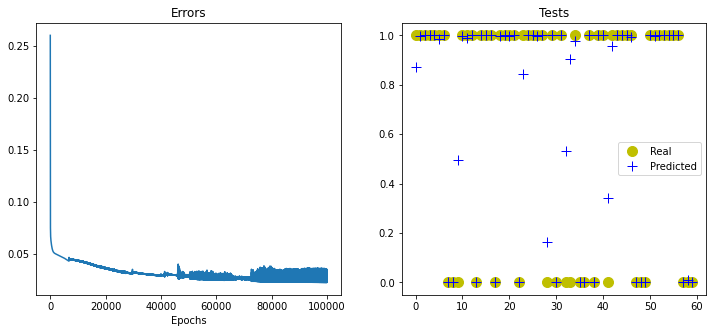

In [ ]:
import matplotlib.pyplot as plt

def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Tests')
    a = plt.plot(saida_testes.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Predicted')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
plotcharts(errors)